<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Проверка-данных-на-аномалии-и-исправления." data-toc-modified-id="Проверка-данных-на-аномалии-и-исправления.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка данных на аномалии и исправления.</a></span></li><li><span><a href="#Изменение-типов-данных." data-toc-modified-id="Изменение-типов-данных.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных.</a></span></li><li><span><a href="#Удаление-дубликатов." data-toc-modified-id="Удаление-дубликатов.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление дубликатов.</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Изучение-данных-збавление-от-выбрасов" data-toc-modified-id="Изучение-данных-збавление-от-выбрасов-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Изучение данных збавление от выбрасов</a></span></li><li><span><a href="#Установление-корреляции-между-параметрами" data-toc-modified-id="Установление-корреляции-между-параметрами-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Установление корреляции между параметрами</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Необходимо научиться определять рыночную стоимость объектов недвижимости.  

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Входной файл: `'/datasets/real_estate_data.csv'`

## Изучение данных из файла

In [19]:
import pandas as pd  #импорт библиотек
import matplotlib.pyplot as plt

In [20]:
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv') 
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Данные склеились в одну строку вместо того, чтобы разбиться по колонкам (total 1 columns), выгрузим таблицу заново, указав в качестве разделителя знак табуляции.

In [21]:
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

###### Описание данных 

Таблица содержи следующую информацию:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  float64
    balcony — число балконов  float64
    ceiling_height — высота потолков (м)  float64
    cityCenters_nearest — расстояние до центра города (м)  float64
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)  float64
    first_day_exposition — дата публикации object
    floor — этаж int64
    floors_total — всего этажей в доме  float64
    is_apartment — апартаменты (булев тип) object
    kitchen_area — площадь кухни в квадратных метрах (м²)  float64
    last_price — цена на момент снятия с публикации  float64
    living_area — жилая площадь в квадратных метрах (м²) float64
    locality_name — название населённого пункта  object
    open_plan — свободная планировка (булев тип) float64
    parks_around3000 — число парков в радиусе 3 км  float64
    parks_nearest — расстояние до ближайшего парка (м)  float64
    ponds_around3000 — число водоёмов в радиусе 3 км  float64
    ponds_nearest — расстояние до ближайшего водоёма (м)  float64
    rooms — число комнат int64 
    studio — квартира-студия (булев тип)  float64
    total_area — площадь квартиры в квадратных метрах (м²)  float64
    total_images — число фотографий квартиры в объявлении int64

Посотрим описательную статистуку по стобцам и первые пять строк таблицы,чтобы составить общее представление о данных.

In [22]:
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [23]:
real_estate_data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В первую очередь приведем название столбца cityCenters_nearest к стандартному виду.

In [24]:
real_estate_data = real_estate_data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Уже после предварительного просмотра данных видны следующие проблемы:

- Количество значений в столбцах различается, значит, в данных есть пропущенные значения.
- тип данных не соответствует содержащейся информации в следующих столбцах:
        
        balcony — число балконов  float64

        days_exposition — сколько дней было размещено объявление (от публикации до снятия)  float64
       
        first_day_exposition — дата публикации object

        floors_total — всего этажей в доме  float64
        
        is_apartment — апартаменты (булев тип) object

        open_plan — свободная планировка (булев тип) float64
        
        parks_around3000 — число парков в радиусе 3 км  float64

        ponds_around3000 — число водоёмов в радиусе 3 км  float64

        studio — квартира-студия (булев тип)  float64

Также необходимо:

- Обработать аномальные выбросы в данных

- Удалить дубликаты



## Предобработка данных

### Заполнение пропусков

Посчитаем сколько в таблице пропущенных значений.

In [25]:
real_estate_data.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения есть во многих стобцах, посмотрим долю пропусков в каждом столбце.

In [26]:
real_estate_data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Значительная доля пропусков в столбцах:
- ceiling_height 0.387991; Почти 40% пропущено. так как это высота потолка, стоит заполнить пропуски средним значением
- is_apartment 0.882906; 88% это очень большая цифра. Так как это булев тип, на первый взгляд пропущенные значения - True, но стоит проверить. Пока кажется это несущественный параметр.
- balcony 0.48605, здесь пропуски лучше запонить 0.
- parks_nearest, ponds_nearest; скорее всего пропущены значения, если рядом парков нет

Здесь скорее всего имеется в виду что поблизости ничего нет.
- airports_nearest        0.233850
- city_centers_nearest    0.232879
- parks_around3000        0.232837
- ponds_around3000        0.232837

In [27]:
#ceiling_height    mean value
ceiling_height_median = real_estate_data['ceiling_height'].median()
real_estate_data['ceiling_height'] =real_estate_data['ceiling_height'].fillna(ceiling_height_median)

#balcony 0
real_estate_data['balcony'] =real_estate_data['balcony'].fillna(0)

#airports_nearest        0.233850
#city_centers_nearest    0.232879
#parks_around3000        0.232837
#parks_nearest           0.659100
#ponds_around3000        0.232837
#ponds_nearest           0.615596
# float => 0

real_estate_data['airports_nearest'] =real_estate_data['airports_nearest'].fillna(0)
#real_estate_data['city_centers_nearest'] =real_estate_data['city_centers_nearest'].fillna(0)
real_estate_data['parks_around3000'] =real_estate_data['parks_around3000'].fillna(0)
real_estate_data['parks_nearest'] =real_estate_data['parks_nearest'].fillna(0)
real_estate_data['ponds_around3000'] =real_estate_data['ponds_around3000'].fillna(0)

real_estate_data['is_apartment'] =real_estate_data['is_apartment'].fillna(True)
real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest            0
city_centers_nearest     5519
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в locality_name важны, но их меньше 1 процента. Остальные кажутся незнчительными.

###  Проверка данных на аномалии и исправления.

###  Изменение типов данных. 

Стоит изменить тип данных в столбцах:

- first_day_exposition non-null object == data
- is_apartment           == bool
- balcony                == int
- floors_total           == int
- days_exposition        == int
- open_plan              == bool
- parks_around3000       == int
- ponds_around3000       == int
- studio                 == bool
  


In [28]:
real_estate_data['balcony'] = real_estate_data['balcony'].astype(int)
#real_estate_data['floors_total'] = real_estate_data['floors_total'].astype(int)
#real_estate_data['days_exposition'] = real_estate_data['days_exposition'].astype(int)
real_estate_data['parks_around3000'] = real_estate_data['balcony'].astype(int)
real_estate_data['parks_around3000'] = real_estate_data['balcony'].astype(int)

real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype(bool)
real_estate_data['open_plan'] = real_estate_data['open_plan'].astype(bool)
real_estate_data['studio'] = real_estate_data['studio'].astype(bool)

real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')#


real_estate_data.info()
#real_estate_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

###  Удаление дубликатов.

Посчитаем и удалим явные дупликаты:

In [29]:
real_estate_data.duplicated().sum() # явных дубликатов нет

0

In [30]:
real_estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем все к нижнему регистру и проверм на дубликаты еще раз.

In [31]:
real_estate_data['locality_name'] = real_estate_data['locality_name'].str.lower()
real_estate_data.duplicated().sum()
#real_estate_data['locality_name'].unique()

0

##### Вывод:
В результате предобработки были выявлено и заполнено значительное кол-во пропусков, дупликаты не найдены. Данные приведены к стандартному виду и подходящему типу. Уже сейчас в описательной статистики видны некоторые выбросы.

## Расчёты и добавление результатов в таблицу

Дополнительно нужно посчитать:

  -  цену квадратного метра;
  -  день недели, месяц и год публикации объявления;
  -  этаж квартиры; варианты — первый, последний, другой;
  -  соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [32]:
#цена квадратного метра;
real_estate_data['price_m_2'] = real_estate_data['last_price']/real_estate_data['total_area']

# день недели, месяц и год публикации объявления;
real_estate_data['day'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).day
real_estate_data['month'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).month
real_estate_data['year'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).year

#таж квартиры; варианты — первый, последний, другой;
real_estate_data['flat_floor'] = 'другой'
real_estate_data['flat_floor'] = real_estate_data['flat_floor'].mask(real_estate_data['floor'] == 1,'первый') 
real_estate_data['flat_floor'] = real_estate_data['flat_floor'].mask(real_estate_data['floor'] == real_estate_data['floors_total'],'последний')

#соотношение жилой и общей площади, а также отношение площади кухни к общей.
real_estate_data['living_area_vs_total'] = real_estate_data['living_area']/real_estate_data['total_area']
real_estate_data['kitchen_area_vs_total'] = real_estate_data['kitchen_area']/real_estate_data['total_area']


real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m_2,day,month,year,flat_floor,living_area_vs_total,kitchen_area_vs_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,120370.370370,7,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,81.0,82920.792079,4,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,2.0,574.0,558.0,92785.714286,20,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,3.0,234.0,424.0,408176.100629,24,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,100000.000000,19,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

#### Изучение данных збавление от выбрасов

Изучим площадь, цену, число комнат, высоту потолков.

In [33]:
real_estate_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

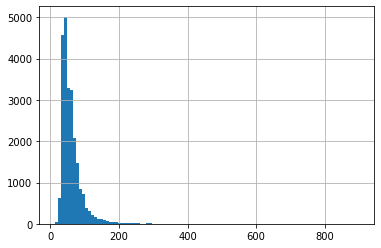

In [34]:
real_estate_data['total_area'].hist(bins = 100)

Для того чтобы отследить выбросы построим boxplot.

(0.0, 200.0)

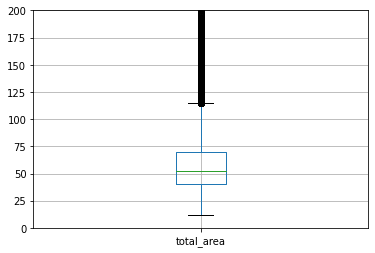

In [35]:
real_estate_data.boxplot(column = 'total_area')
#plt.xlim(0,2000)
plt.ylim(0, 200)

Начиная со значения 120+- идут выбросы, от них стоит избавится.

<AxesSubplot:>

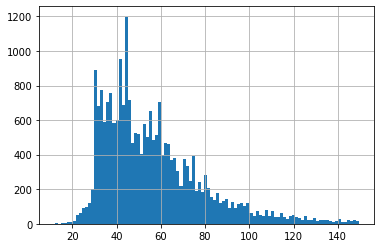

In [36]:
real_estate_data['total_area_clean'] = real_estate_data['total_area'].where(real_estate_data['total_area']<150)


real_estate_data['total_area_clean'].hist(bins = 100)

Распределение выглядит логичнее,на рынке преобладают неюольшие и среднего размера квартиры. Скорее распределение Пуассона со смещением на минимальную площадь квартиры.


С другими параметрами поступим аналогично

In [37]:
real_estate_data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

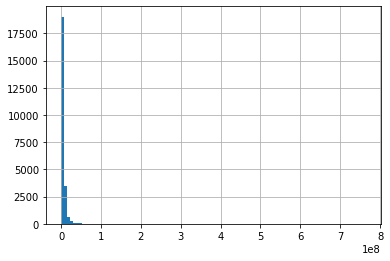

In [38]:
#real_estate_data['total_area'].hist(bins = 100)
real_estate_data['last_price'].hist(bins = 100)


(0.0, 13000000.0)

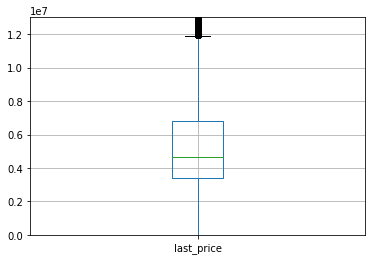

In [39]:
real_estate_data.boxplot(column = 'last_price')
#plt.xlim(0,2000)
plt.ylim(0, 13000000)

<AxesSubplot:>

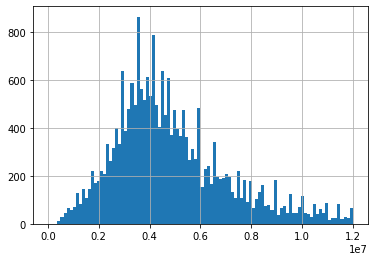

In [40]:
real_estate_data['last_price_clean'] = real_estate_data['last_price'].where(real_estate_data['last_price']<12000000)


real_estate_data['last_price_clean'].hist(bins = 100)

In [41]:
real_estate_data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

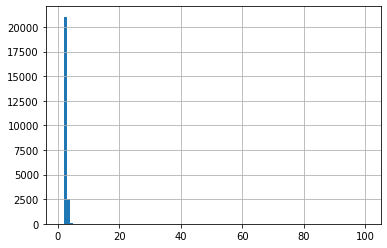

In [42]:
real_estate_data['ceiling_height'].hist(bins = 100)

(2.0, 3.5)

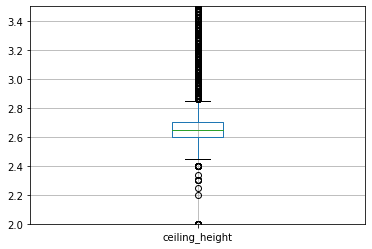

In [43]:
real_estate_data.boxplot(column = 'ceiling_height')
#plt.xlim(0,2000)
plt.ylim(2, 3.5)

<AxesSubplot:>

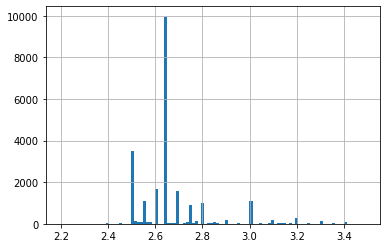

In [44]:
real_estate_data['ceiling_height_clean'] = real_estate_data['ceiling_height'].where(real_estate_data['ceiling_height']<3.5)
real_estate_data['ceiling_height_clean'] = real_estate_data['ceiling_height_clean'].where(real_estate_data['ceiling_height_clean']>2)

real_estate_data['ceiling_height_clean'].hist(bins = 100)

<AxesSubplot:>

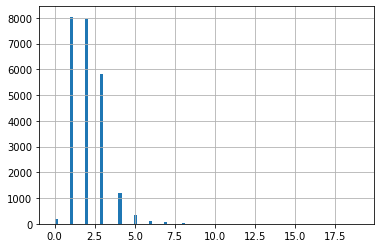

In [45]:
real_estate_data['rooms'].hist(bins = 100)

(0.0, 7.0)

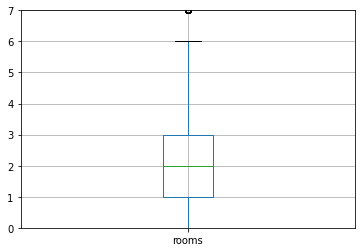

In [46]:
real_estate_data.boxplot(column = 'rooms')
#plt.xlim(0,2000)
plt.ylim(0, 7)

<AxesSubplot:>

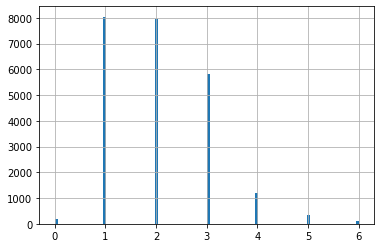

In [47]:
real_estate_data['rooms_clean'] = real_estate_data['rooms'].where(real_estate_data['rooms']<=6)


real_estate_data['rooms_clean'].hist(bins = 100)

In [48]:
real_estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-1.0, 800.0)

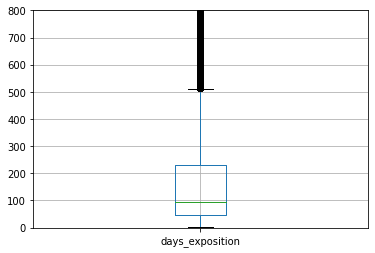

In [49]:
real_estate_data.boxplot(column = 'days_exposition')
#plt.xlim(0,2000)
plt.ylim(-1, 800)

<AxesSubplot:>

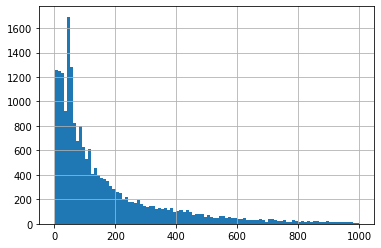

In [50]:
real_estate_data['days_exposition_clean'] = real_estate_data['days_exposition'].where(real_estate_data['days_exposition']<=1000)


real_estate_data['days_exposition_clean'].hist(bins = 100)

In [51]:
real_estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [53]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  float64       
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         23699 non-null  float64       
 6   floors_total           23613 non-null  float64       
 7   living_area            21796 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           23699 non-null  bool          
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           21421 non-null  float64       
 13  b

In [54]:
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,day,month,year,living_area_vs_total,kitchen_area_vs_total,total_area_clean,last_price_clean,ceiling_height_clean,rooms_clean,days_exposition_clean
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000,23117.000000,2.170000e+04,23251.000000,23609.000000,20242.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,...,15.481582,6.400101,2017.367146,0.564766,0.187355,56.479872,4.860269e+06,2.678825,2.047905,167.411866
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,...,8.642389,3.491561,1.039771,0.105368,0.072968,22.817434,2.246415e+06,0.165320,1.006772,187.599458
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,1.000000,2014.000000,0.021583,0.025381,12.000000,1.219000e+04,2.200000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,8.000000,3.000000,2017.000000,0.495177,0.133333,40.000000,3.300000e+06,2.600000,1.000000,44.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,15.000000,6.000000,2017.000000,0.567860,0.172414,51.000000,4.400000e+06,2.650000,2.000000,93.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,23.000000,10.000000,2018.000000,0.637880,0.232416,67.700000,6.000000e+06,2.700000,3.000000,222.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,31.000000,12.000000,2019.000000,1.000000,0.787879,149.600000,1.199900e+07,3.490000,6.000000,1000.000000


#### Установление корреляции между параметрами

Корреляция между ценой и площадью квартир;

<AxesSubplot:xlabel='last_price_clean', ylabel='total_area_clean'>

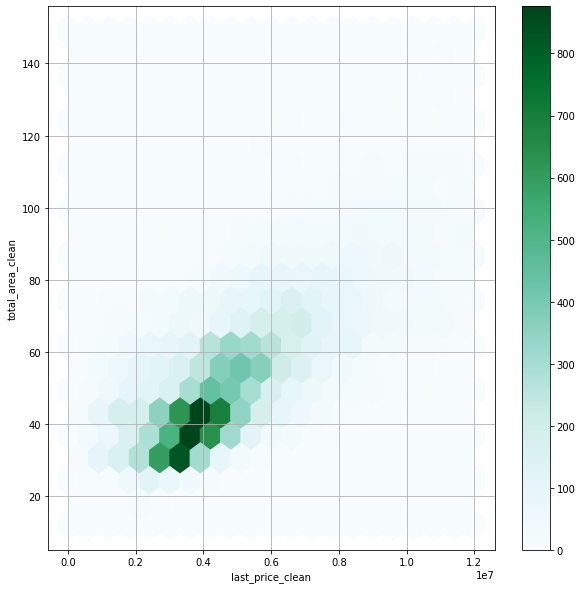

In [34]:
real_estate_data.plot(x='last_price_clean', y='total_area_clean', kind='hexbin', gridsize=20, figsize=(10,10), sharex=False, grid=True) 

<AxesSubplot:xlabel='total_area_clean', ylabel='last_price_clean'>

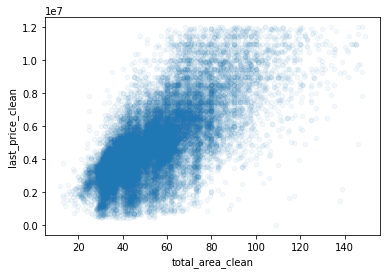

In [60]:
real_estate_data.plot(x='total_area_clean',y ='last_price_clean', kind='scatter', alpha=0.05) 

Коэфициент корреляции высокий (близок к 1), это значит что цена и площадь сильно связаны, причем напрямую, больше площадь - выше цена.

In [35]:
real_estate_data['last_price_clean'].corr(real_estate_data['total_area_clean'])

0.7040004691854211

Аналогично для других переменных.

<AxesSubplot:xlabel='total_area_clean', ylabel='price_m_2'>

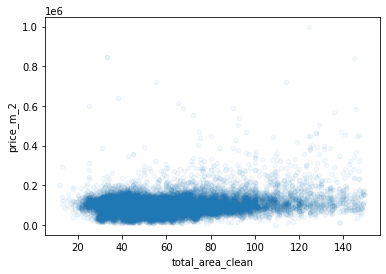

In [61]:
real_estate_data.plot(x='total_area_clean',y ='price_m_2', kind='scatter', alpha=0.05) 

In [36]:
real_estate_data['price_m_2'].corr(real_estate_data['total_area_clean'])

0.1959879254250555

<AxesSubplot:xlabel='total_area_clean', ylabel='rooms_clean'>

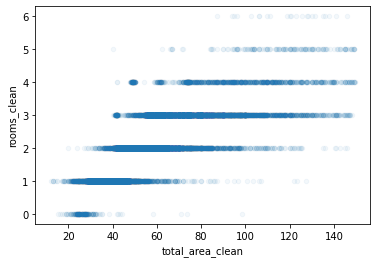

In [62]:
real_estate_data.plot(x='total_area_clean',y ='rooms_clean', kind='scatter', alpha=0.05) 

In [37]:
real_estate_data['last_price_clean'].corr(real_estate_data['rooms_clean'])

0.455369620191646

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price_clean'>

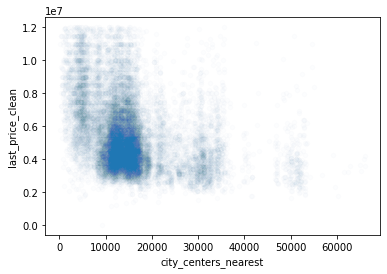

In [76]:
real_estate_data.plot(x='city_centers_nearest',y ='last_price_clean', kind='scatter', alpha=0.01) 

In [67]:
real_estate_data['last_price_clean'].corr(real_estate_data['city_centers_nearest'])

-0.34676663593243634

<AxesSubplot:xlabel='floor', ylabel='last_price_clean'>

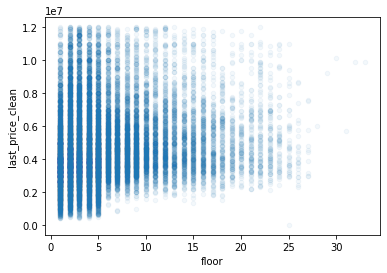

In [68]:
real_estate_data.plot(x='floor',y ='last_price_clean', kind='scatter', alpha=0.05) 

In [69]:
real_estate_data['last_price_clean'].corr(real_estate_data['floor'])

0.12631804189917054

<AxesSubplot:xlabel='day', ylabel='last_price_clean'>

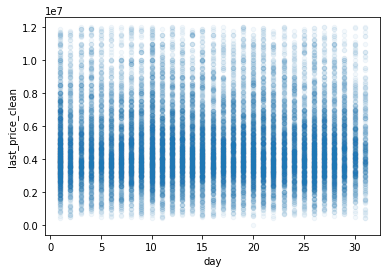

In [70]:
real_estate_data.plot(x='day',y ='last_price_clean', kind='scatter', alpha=0.05) 

In [71]:
real_estate_data['last_price_clean'].corr(real_estate_data['day'])

-0.00339272976402712

Отрицательный покатель корреляции говорит о том, что переменные имеют обратную зависимость друг от друга. Но такт как по модулю значение очень мало, значит зависимости почти нет.

<AxesSubplot:xlabel='month', ylabel='last_price_clean'>

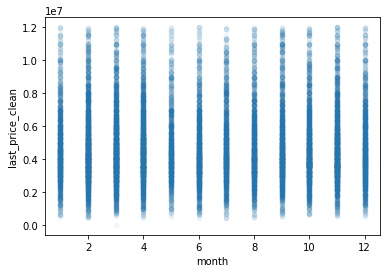

In [72]:
real_estate_data.plot(x='month',y ='last_price_clean', kind='scatter', alpha=0.05) 

In [73]:
real_estate_data['last_price_clean'].corr(real_estate_data['month'])

0.005661561158087215

<AxesSubplot:xlabel='year', ylabel='last_price_clean'>

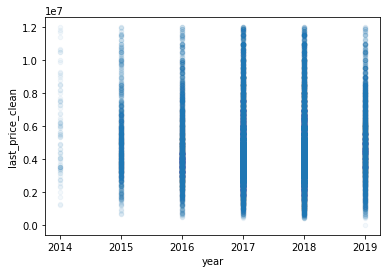

In [74]:
real_estate_data.plot(x='year',y ='last_price_clean', kind='scatter', alpha=0.05) 

In [75]:
real_estate_data['last_price_clean'].corr(real_estate_data['year'])

-0.004946171449599802

######  Промежуточный вывод

Цена на квартиру в основном зависит от площади и кол-ва комнат.

Квартиры расположенные до 5 этаже представленны на рынке больше всего, причем 2-3этаж цена несколько выше.

В 2017-2018 выставлялось больше всего предложений.


###### Найдем топ 10 городов по кол-ву обьявлений.

In [77]:
real_estate_data_top_10 = real_estate_data['locality_name'].value_counts().head(10)
real_estate_data_top_10

санкт-петербург      15721
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

И среднюю цену за метр квадратный для этих населенных пунктов.

In [78]:
real_estate_data_pivot = real_estate_data.pivot_table(index = 'locality_name', values = 'price_m_2',aggfunc = 'mean')

real_estate_data_top_10_price_m_2 = real_estate_data_pivot[real_estate_data_pivot
                                                           .index.isin(real_estate_data_top_10.index)]

real_estate_data_top_10_price_m_2 = real_estate_data_top_10_price_m_2.sort_values(by = 'price_m_2', ascending = False)
real_estate_data_top_10_price_m_2

,price_m_2
locality_name,
санкт-петербург,114849.008794
пушкин,103125.819291
деревня кудрово,92473.547576
посёлок парголово,90175.913458
посёлок мурино,85752.189195
посёлок шушары,78677.364217
колпино,75424.579098
гатчина,68746.146763
всеволожск,68654.473986


Выделим сегмент квартир в центре. Проанализируем следующие параметры: площадь, цена, число комнат, высота потолков

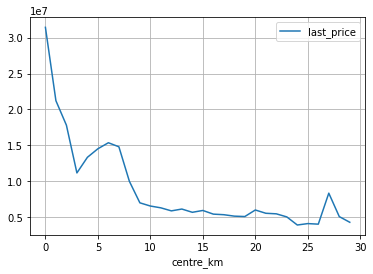

In [79]:
real_estate_data['centre_km'] = real_estate_data['city_centers_nearest']/1000
real_estate_data['centre_km'] = real_estate_data['centre_km'].round()

real_estate_data_spb = real_estate_data.loc[real_estate_data['locality_name'] == 'санкт-петербург']

data_spb = real_estate_data_spb.pivot_table(index = 'centre_km', values = ['last_price'], aggfunc = 'mean')

data_spb.plot(grid = True)
plt.show()

Область радиусом +- 4км можно считать центром.

Проведем анализ для квартир, находящихся в этой области.

In [80]:
data_centre =  real_estate_data[real_estate_data['centre_km'] < 4] # Выделяем квартиры, которые находятся в центре
data_centre

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,flat_floor,living_area_vs_total,kitchen_area_vs_total,total_area_clean,last_price_clean,ceiling_height_clean,rooms_clean,days_exposition_clean,centre_km
24,8,6500000.0,97.2,2015-10-31,2,2.65,3.0,46.5,1,True,...,2015,первый,0.478395,0.201646,97.2,6500000.0,2.65,2.0,265.0,2.0
99,32,9600000.0,90.0,2017-09-26,4,2.65,5.0,67.0,2,True,...,2017,другой,0.744444,0.088889,90.0,9600000.0,2.65,4.0,104.0,3.0
138,8,4800000.0,40.0,2017-11-18,2,2.65,3.0,29.0,2,True,...,2017,другой,0.725000,0.150000,40.0,4800000.0,2.65,2.0,80.0,3.0
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.2,2,True,...,2018,другой,0.552500,0.152500,80.0,8200000.0,NaN,3.0,38.0,3.0
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,True,...,2017,последний,0.577287,NaN,NaN,NaN,NaN,4.0,62.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,18,5260000.0,38.0,2018-11-06,1,3.30,5.0,16.0,1,True,...,2018,первый,0.421053,0.315789,38.0,5260000.0,3.30,1.0,12.0,3.0
23449,4,6300000.0,52.6,2015-05-28,3,3.25,5.0,29.8,2,True,...,2015,другой,0.566540,0.165399,52.6,6300000.0,3.25,3.0,505.0,3.0
23555,5,15350000.0,158.5,2019-03-07,7,2.95,7.0,57.4,7,True,...,2019,последний,0.362145,0.078233,NaN,NaN,2.95,NaN,NaN,3.0
23602,0,8700000.0,73.0,2019-01-23,3,2.65,4.0,NaN,4,True,...,2019,последний,NaN,NaN,73.0,8700000.0,2.65,3.0,34.0,2.0


In [81]:
data_centre.describe() # Вывод статистики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,month,year,living_area_vs_total,kitchen_area_vs_total,total_area_clean,last_price_clean,ceiling_height_clean,rooms_clean,days_exposition_clean,centre_km
count,883.000000,8.830000e+02,883.000000,883.000000,883.000000,881.000000,829.000000,883.000000,806.000000,883.000000,...,883.000000,883.000000,829.000000,806.000000,759.000000,5.520000e+02,733.000000,857.000000,702.000000,883.000000
mean,10.499434,1.628459e+07,98.602401,3.109853,3.069909,4.994325,61.032618,3.150623,14.968784,0.115515,...,6.420159,2017.139298,0.608277,0.165373,80.881634,7.798066e+06,2.905634,2.967328,226.705128,2.118913
std,6.331252,2.640215e+07,56.454467,1.483983,0.904586,1.215885,38.658509,1.501687,9.250928,0.415430,...,3.551232,1.154635,0.106721,0.085367,28.212551,2.160122e+06,0.268982,1.222399,228.441610,0.852178
min,0.000000,2.100000e+06,12.000000,0.000000,2.500000,2.000000,9.000000,1.000000,3.500000,0.000000,...,1.000000,2014.000000,0.208333,0.025381,12.000000,2.100000e+06,2.500000,0.000000,3.000000,0.000000
25%,6.000000,7.300000e+06,63.300000,2.000000,2.650000,4.000000,36.000000,2.000000,9.025000,0.000000,...,3.000000,2017.000000,0.544444,0.111111,60.000000,6.200000e+06,2.650000,2.000000,60.000000,2.000000
50%,10.000000,9.800000e+06,85.000000,3.000000,3.000000,5.000000,51.000000,3.000000,12.000000,0.000000,...,7.000000,2017.000000,0.617220,0.142857,78.600000,7.925000e+06,2.850000,3.000000,132.500000,2.000000
75%,15.000000,1.499500e+07,116.500000,4.000000,3.300000,6.000000,72.000000,4.000000,18.275000,0.000000,...,10.000000,2018.000000,0.685315,0.193608,99.100000,9.362500e+06,3.150000,4.000000,330.000000,3.000000
max,50.000000,4.013000e+08,517.000000,14.000000,27.000000,12.000000,332.000000,10.000000,87.200000,4.000000,...,12.000000,2019.000000,0.957746,0.560526,149.200000,1.199900e+07,3.490000,6.000000,992.000000,3.000000


Построим диаграммы рассеивания, для выявления зависимости между ценой и основными факторами (площадь, кол-во комнат, высота потолков)

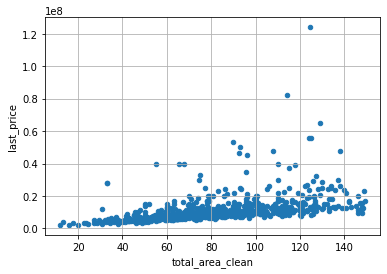

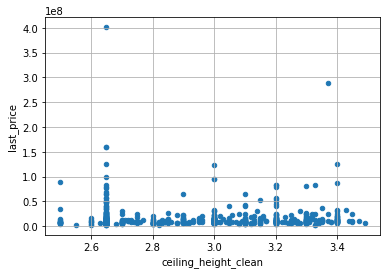

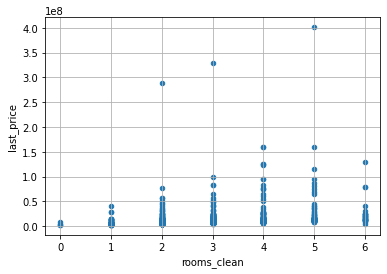

In [82]:
data_centre.plot(x = 'total_area_clean',y = 'last_price',kind='scatter', grid=True)
data_centre.plot(x = 'ceiling_height_clean',y = 'last_price',kind='scatter', grid=True)
data_centre.plot(x = 'rooms_clean',y = 'last_price',kind='scatter', grid=True)

plt.show()

In [83]:
real_estate_data['last_price'].corr(real_estate_data['total_area_clean'])
#real_estate_data['last_price'].corr(real_estate_data['ceiling_height_clean']) #0.2358769439844683
#real_estate_data['last_price'].corr(real_estate_data['rooms_clean']) #0.3672485592145733


0.6965023284424366

## Общий вывод

    Из предоставленных данных можно сделать следующие выводы:
    - На стоимость квартиры сильнее всего влияет площадь и кол-во комнат: коэффициент корреляции 0,7 и 0,45 соответственно.
    
    - Для наиболее представленных в выборке городов самая высокая цена за квадратный метр в Санкт-Петербурге.
    
    - Цена резко идет на спад с расстояния в 4 метра от центра города.
    
    - Для квартир располагающихся в центре зависимости схожие, но корреляция цены и высоты потолков несколько выше